## Python Demo for Model Assessment:

## 4. Bias-variance trade-off

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
from pandas import Series, DataFrame

ffun = lambda x: np.exp(-(x-3)**2)
x = np.arange(0.1,4,0.1)
rnd.seed(2017)
y = ffun(x) + 0.1*rnd.normal(0,1,len(x))
DataX = DataFrame(x)
DataX['1'] = y
DataX.head()

,0,1
0,0.1,-0.102072
1,0.2,-0.013646
2,0.3,0.020592
3,0.4,0.058507
4,0.5,-0.037527


In [9]:
fig, subplt = plt.subplots(1, 2)
fig.set_size_inches(16, 5)
subplt[0].plot(x,y,'o',label = "Polynomial Curve Fitting")
subplt[0].set_title("Generating points and original line")
subplt[0].set_xlabel("x")
subplt[0].set_ylabel("y")
subplt[0].plot(x,ffun(x))


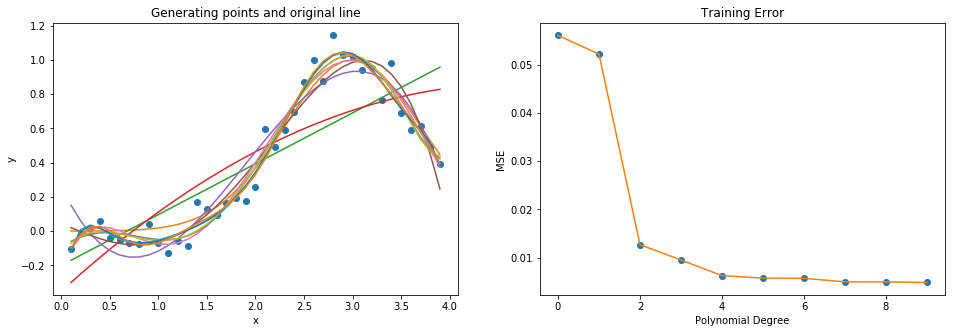

In [11]:
from sklearn.linear_model import LinearRegression
from numpy import polyfit
from numpy import polyval
from numpy import linspace
dmax = 10
err = []
for d in range(dmax):
    Coef = polyfit(x,y,deg = d+1)
    yfitted = polyval(Coef,x)
    subplt[0].plot(x,yfitted)
    err.append(sum((y-yfitted)**2)/len(x))
#plt.subplot(122)
subplt[1].plot(range(dmax),err,'o')
subplt[1].plot(range(dmax),err)
subplt[1].set_title("Training Error")
subplt[1].set_xlabel("Polynomial Degree")
subplt[1].set_ylabel("MSE")
plt.show()

In [12]:
nfold = 5
n1 = np.floor(len(DataX)/nfold)
maxrep = 30#Monte-Carlo Replicates
rnd.seed(9999)
ErrorTest = []
for i in range(maxrep):
    tempX = DataX.sample(frac = 1)
    tempX.yhat = []
    cv = []
    tempXsize = len(tempX)
    for d in range(dmax):
        for k in range(nfold):
            Idx = linspace(n1*(k),n1*(k+1)-1,n1)
            if k==(nfold-1):
                Idx = linspace(n1*(k), tempXsize-1, tempXsize-n1*k)
            IdxLeft = [i for i in range(len(DataX)) if i not in Idx]
            #print("Idx is :",Idx)
            #print("Len(Idx) is :",len(Idx))
            #print("Len(tempX) is :",len(tempX))
            TestX = tempX.iloc[Idx,:]
            TrainX = tempX.iloc[IdxLeft,:]
            fit = polyfit(x = TrainX.iloc[:,0],
                          y = TrainX.iloc[:,1],deg = d+1)
            fittedY = polyval(fit,TestX.iloc[:,0])
            for j in range(len(fittedY)):
                tempX.yhat.append(fittedY[j])
        residuals = tempX.yhat-tempX.iloc[:,1]
        tempX.yhat = []
        cv.append(sum(residuals**2)/tempXsize)
    ErrorTest.append(cv)
    
#Draw the bias-variance trade-off
for i in range(len(ErrorTest)):
    plt.plot(linspace(1,10,10),ErrorTest[i],'-.',color = 'c',linewidth=0.5)
plt.title("Bias-Variance Trade-off of Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Prediction Error")
          

/Users/lihaoyu/anaconda/lib/python3.5/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


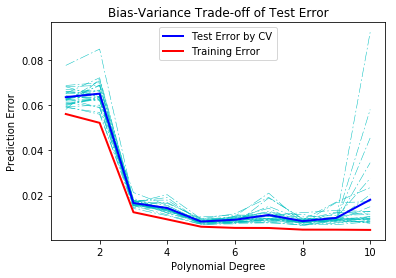

In [13]:
Rowmeans = []
for i in range(10):
    tmpsum = 0
    for j in range(len(ErrorTest)):
        tmpsum += ErrorTest[j][i]
    Rowmeans.append(tmpsum/len(ErrorTest))
line1 = plt.plot(linspace(1,10,10),Rowmeans,'-',label = 'Test Error by CV',color = 'b',linewidth = 2)
line2 = plt.plot(linspace(1,10,10),err,'-',label ='Training Error',color = 'r',linewidth = 2)
plt.legend(loc = 'best')
plt.show()

## 5. Bootstrap Tobedone